In [1]:
### Importing Libraries
import pandas as pd
import numpy as np
import warnings

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Training Data
df = pd.read_csv("C:/Users/DELL/Desktop/Training Data - Classification of Patients with Abnormal Blood Pressure ....csv")

In [3]:
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [4]:
## Getting basic description of data
df.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.356500,0.298000
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.479085,0.457494
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.000000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,0.000000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.000000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


In [5]:
## checking for the classes distribution in target column
df['Blood_Pressure_Abnormality'].value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

In [6]:
## Column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [7]:
### checking for null
df.isnull()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1997,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1998,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [9]:
## splitting the Dataset

train, test = train_test_split(df, train_size=0.9 ,test_size = 0.1, random_state=50, stratify=df['Blood_Pressure_Abnormality'])

In [10]:
##### Exploratory Data Analysis

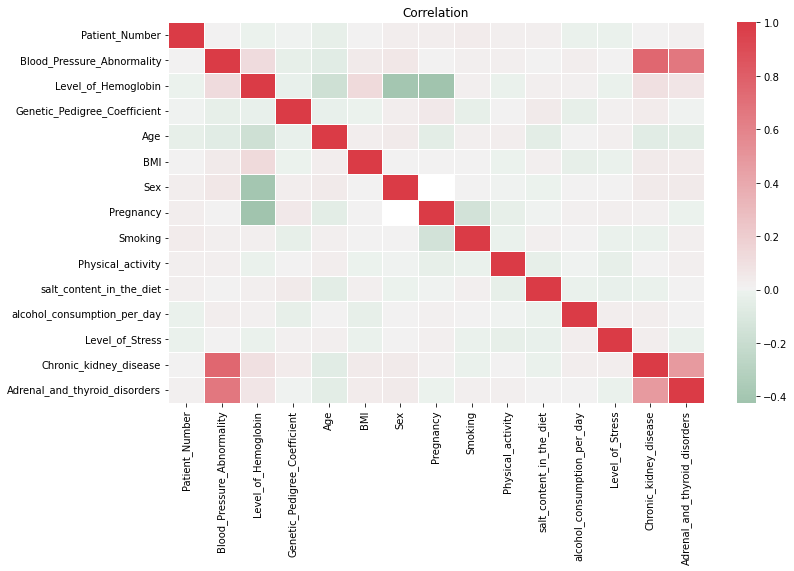

In [11]:
## Correlation matrix

corr = train.corr()

# plot the heatmap
fig, axes = plt.subplots(1, 1)

fig.set_figheight(7)
fig.set_figwidth(12)

cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        linewidths=1, cmap=cmap, center=0)

plt.title("Correlation")
plt.show()

<AxesSubplot:>

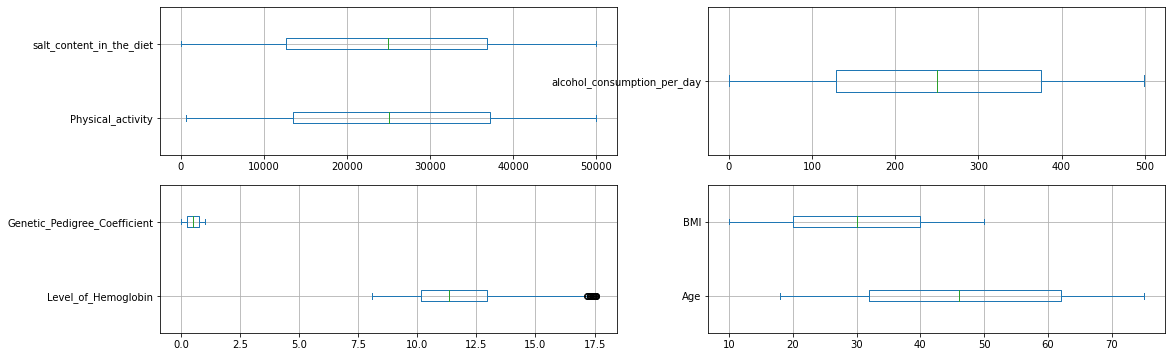

In [12]:
## Boxplot for checking the outliers and variance in data

fig, axes = plt.subplots(2, 2, figsize = (18,6))

boxplot_cols1 = ['Physical_activity','salt_content_in_the_diet']
boxplot_cols2 = ['alcohol_consumption_per_day']
boxplot_cols3 = ['Age','BMI']
boxplot_cols4 = ['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient']

train[boxplot_cols2].plot.box(vert = False, grid = True, ax=axes[0][1])
train[boxplot_cols1].plot.box(vert = False, grid = True, ax=axes[0][0])
train[boxplot_cols4].plot.box(vert = False, grid = True, ax=axes[1][0])
train[boxplot_cols3].plot.box(vert = False, grid = True, ax=axes[1][1])

C:\Users\DELL\AppData\Local\Temp/ipykernel_9644/2919440840.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train[column_for_hist].hist(bins=50, ax = ax)


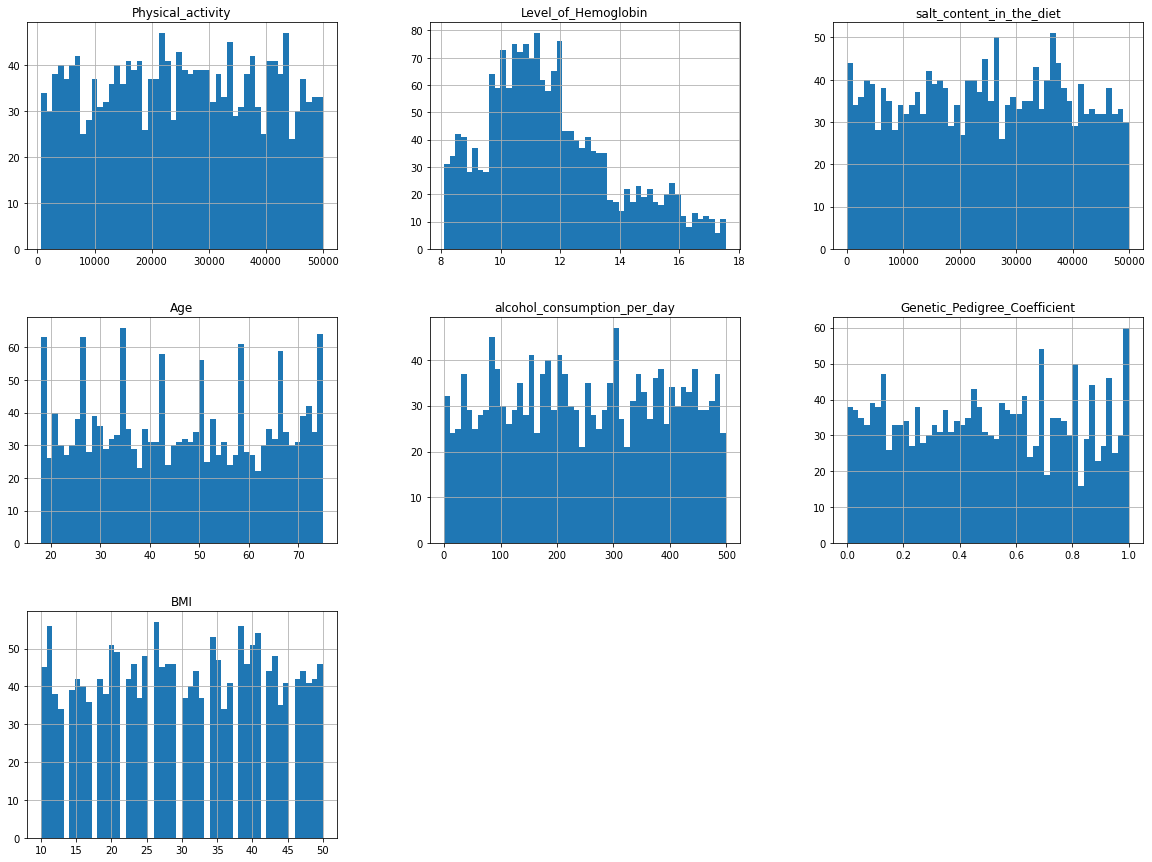

In [13]:
## Histogram to check the values distribution 

column_for_hist = ['Physical_activity','Level_of_Hemoglobin','salt_content_in_the_diet','Age','alcohol_consumption_per_day',
               'Genetic_Pedigree_Coefficient','BMI']

fig = plt.figure(figsize = (20,15))
ax = fig.gca()

train[column_for_hist].hist(bins=50, ax = ax)
plt.show()

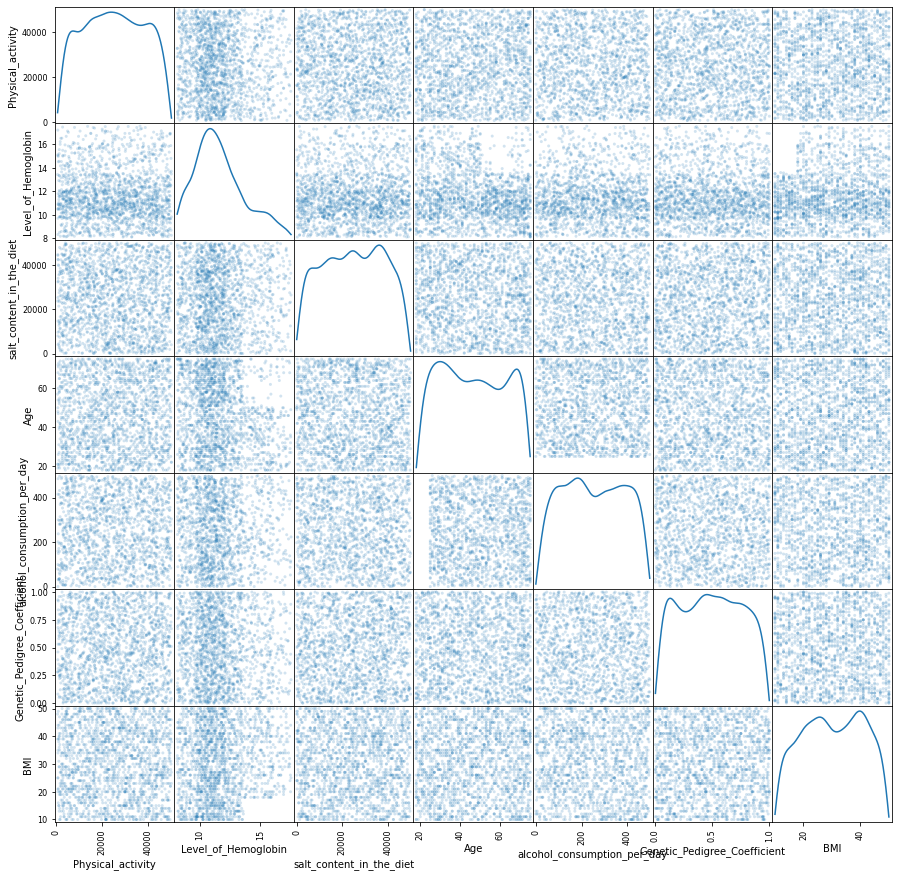

In [14]:
## scatter plot for checking the relationship between numerical variables

df_scatter = train[column_for_hist]
scatter_matrix(df_scatter, alpha=0.2, figsize=(15, 15), diagonal="kde");

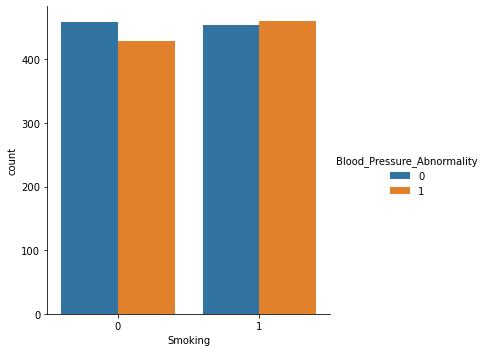

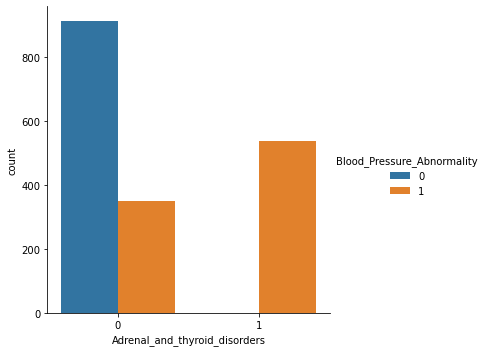

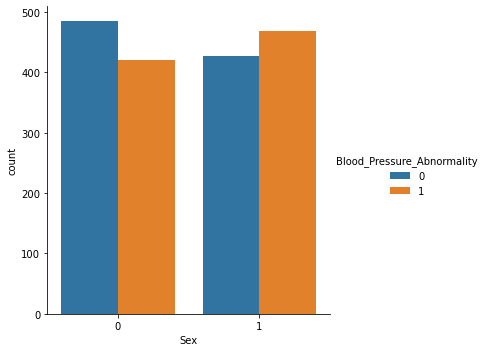

In [15]:
## Barplots for categorical variable to check the association with the Target variable

sns.catplot(x="Smoking", kind="count", hue="Blood_Pressure_Abnormality", data=train)
sns.catplot(x="Adrenal_and_thyroid_disorders", kind="count", hue="Blood_Pressure_Abnormality", data=train)
sns.catplot(x="Sex", kind="count", hue="Blood_Pressure_Abnormality", data=train)


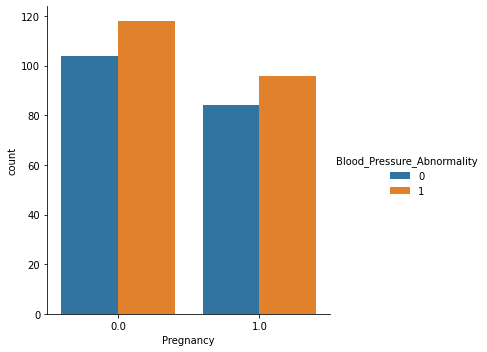

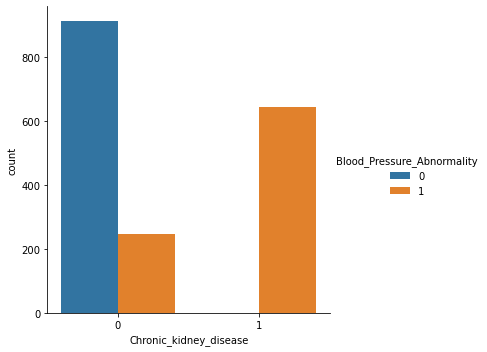

In [16]:
sns.catplot(x="Pregnancy", kind="count", hue="Blood_Pressure_Abnormality", data=train)
sns.catplot(x="Chronic_kidney_disease", kind="count", hue="Blood_Pressure_Abnormality", data=train)

plt.show()

In [17]:
## Missing value imputation using IterativeImputer

def missingval_imput(df):
    
    ## Creating copy of dataframe
    df_imputed = df.copy()

    ## Imputing 'Pregnancy' column values, putting Pregnancy=0 where Sex=0
    mask = df_imputed['Sex'] == 0
    df_imputed.loc[mask, 'Pregnancy'] = 0

    ## Remaining 'NaN' value is replaced with -1 
    df_imputed['Pregnancy'].fillna(-1, inplace=True)
    
    ## Changing the column type from float to int
    df_imputed['Pregnancy'] = df_imputed['Pregnancy'].astype(int)
    
    ## missing values imputation using Iterative Imputer for columns 'Genetic_Pedigree_Coefficient' and 'alcohol_consumption_per_day'

    # Define modelling pipeline
    model = ExtraTreesRegressor(n_estimators=18, random_state=0)
    imputer = IterativeImputer(estimator=model)

    # Fitting the model
    imputer.fit(df_imputed)

    imputed_values = pd.DataFrame(imputer.transform(df_imputed), columns=df_imputed.columns)

    imputed_values['Patient_Number'] = imputed_values['Patient_Number'].astype(int)
    imputed_values_subset = imputed_values[['Patient_Number','Genetic_Pedigree_Coefficient', 'alcohol_consumption_per_day']]


    df_imputed.drop(['Genetic_Pedigree_Coefficient', 'alcohol_consumption_per_day'], axis = 1, inplace=True)
    df_imputed = pd.merge(df_imputed,imputed_values_subset, on=['Patient_Number'], how='left')
    
    return df_imputed


In [18]:
## Data Normalization

def data_normalization(df):
    
    cols_to_transform = ['Level_of_Hemoglobin','Age','BMI','Physical_activity','salt_content_in_the_diet','alcohol_consumption_per_day']
    df_to_transform = df[cols_to_transform]

    transfrm = MinMaxScaler()
    scaled_features = transfrm.fit_transform(df_to_transform)

    # convert the array back to a dataframe
    df_transformed = pd.DataFrame(scaled_features, index=df_to_transform.index, columns=df_to_transform.columns)

    df_subset = df.drop(cols_to_transform, axis=1)
    df_train_transformed = pd.concat([df_transformed,df_subset], axis=1)
    
    return df_train_transformed

In [19]:
### One-hot encoding of categorical variables

def OneHotEncoding(df):
    
    df = pd.get_dummies(df, columns=['Pregnancy','Level_of_Stress'])

    ## Dropping column 'Patient_Number' because  it is the unique id of patient, so not much useful for analysis
    df.drop(['Patient_Number'], axis=1, inplace=True)
    
    return df

In [20]:
## Data preparation Function 

def data_preparation(df):
    
    df_missingval_imput = missingval_imput(df)
    df_data_normalized = data_normalization(df_missingval_imput)
    df_Onehot_encoding = OneHotEncoding(df_data_normalized)
    
    return df_Onehot_encoding
    

In [21]:
## Data Preparation for Training set
train_cleaned = data_preparation(train)

## Data Preparation for Test set
test_cleaned = data_preparation(test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [22]:
train_cleaned.shape

(1800, 18)

In [23]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1799
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Level_of_Hemoglobin            1800 non-null   float64
 1   Age                            1800 non-null   float64
 2   BMI                            1800 non-null   float64
 3   Physical_activity              1800 non-null   float64
 4   salt_content_in_the_diet       1800 non-null   float64
 5   alcohol_consumption_per_day    1800 non-null   float64
 6   Blood_Pressure_Abnormality     1800 non-null   int64  
 7   Sex                            1800 non-null   int64  
 8   Smoking                        1800 non-null   int64  
 9   Chronic_kidney_disease         1800 non-null   int64  
 10  Adrenal_and_thyroid_disorders  1800 non-null   int64  
 11  Genetic_Pedigree_Coefficient   1800 non-null   float64
 12  Pregnancy_-1                   1800 non-null   u

In [24]:
# removing target variable from X_train and X_test
X_train = train_cleaned.drop(['Blood_Pressure_Abnormality'], axis=1)
X_test = test_cleaned.drop(['Blood_Pressure_Abnormality'], axis=1)

# Putting target variable to y_train and y_test
y_train = train_cleaned['Blood_Pressure_Abnormality']
y_test = test_cleaned['Blood_Pressure_Abnormality']

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1799
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Level_of_Hemoglobin            1800 non-null   float64
 1   Age                            1800 non-null   float64
 2   BMI                            1800 non-null   float64
 3   Physical_activity              1800 non-null   float64
 4   salt_content_in_the_diet       1800 non-null   float64
 5   alcohol_consumption_per_day    1800 non-null   float64
 6   Sex                            1800 non-null   int64  
 7   Smoking                        1800 non-null   int64  
 8   Chronic_kidney_disease         1800 non-null   int64  
 9   Adrenal_and_thyroid_disorders  1800 non-null   int64  
 10  Genetic_Pedigree_Coefficient   1800 non-null   float64
 11  Pregnancy_-1                   1800 non-null   uint8  
 12  Pregnancy_0                    1800 non-null   u

In [25]:
# Creating Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100)

# Training the model
classifier.fit(X_train,y_train)

# predicting probabilities
rf_probs = classifier.predict_proba(X_test)

# keeping probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predicting 
y_pred=classifier.predict(X_test)

In [26]:
### ACCURACY OF THE MODEL
print("Accuracy of the model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model: 0.945


In [27]:
## Important featuers in the Dataset

feature_imp = pd.Series(classifier.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

Chronic_kidney_disease           0.379429
Adrenal_and_thyroid_disorders    0.268136
Genetic_Pedigree_Coefficient     0.127002
Level_of_Hemoglobin              0.113945
salt_content_in_the_diet         0.020860
Age                              0.019062
alcohol_consumption_per_day      0.018672
Physical_activity                0.017490
BMI                              0.016337
Smoking                          0.003308
Pregnancy_0                      0.002797
Level_of_Stress_3                0.002676
Sex                              0.002615
Level_of_Stress_1                0.002154
Pregnancy_-1                     0.002140
Level_of_Stress_2                0.002134
Pregnancy_1                      0.001245
dtype: float64

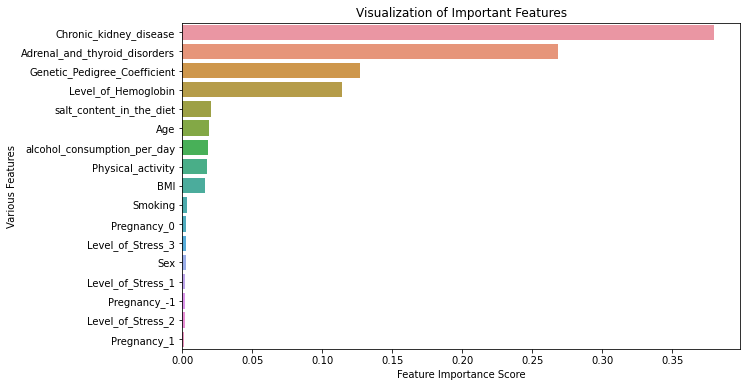

In [28]:
### a bar plot for Feature Importance
Diagram = plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Various Features')
plt.title("Visualization of Important Features")
plt.show()

In [29]:
### Different model metrics

print("Precision :: %.3f"% precision_score(y_test, y_pred))
print("Recall    :: %.3f"% recall_score(y_test, y_pred))
print("AUC Score :: %.3f"% roc_auc_score(y_test, rf_probs))
print("F1 Score  :: %.3f"% f1_score(y_test, y_pred))




Precision :: 0.989
Recall    :: 0.899
AUC Score :: 0.984
F1 Score  :: 0.942


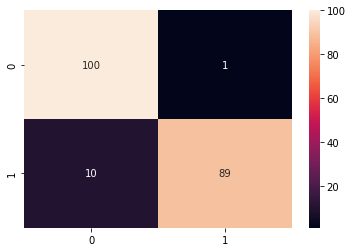

In [30]:
### Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.show()

In [31]:
### ACCURACY OF THE MODEL
print("Accuracy of the model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model: 0.945
